In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/amitkaps/weed/Demographics_State.csv')
df.head()

,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
0,alabama,4799277,67,26,1,4,23680,501,38.1
1,alaska,720316,63,3,5,6,32651,978,33.6
2,arizona,6479703,57,4,3,30,25358,747,36.3
3,arkansas,2933369,74,15,1,7,22170,480,37.5
4,california,37659181,40,6,13,38,29527,1119,35.4


In [3]:
df.shape

(51, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   region             51 non-null     object 
 1   total_population   51 non-null     int64  
 2   percent_white      51 non-null     int64  
 3   percent_black      51 non-null     int64  
 4   percent_asian      51 non-null     int64  
 5   percent_hispanic   51 non-null     int64  
 6   per_capita_income  51 non-null     int64  
 7   median_rent        51 non-null     int64  
 8   median_age         51 non-null     float64
dtypes: float64(1), int64(7), object(1)
memory usage: 3.7+ KB


In [5]:
df.describe()

,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
count,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,6.108561e+06,70.254902,10.823529,3.725490,10.803922,28053.803922,719.490196,37.639216
std,6.904016e+06,16.116877,10.867761,5.355664,9.996038,4659.378182,189.820375,2.352367
min,5.701340e+05,23.000000,0.000000,1.000000,1.000000,20618.000000,448.000000,29.600000
25%,1.712494e+06,59.500000,3.000000,1.000000,4.500000,24908.500000,566.000000,36.300000
50%,4.361333e+06,74.000000,7.000000,2.000000,8.000000,26824.000000,664.000000,37.600000
75%,6.712318e+06,82.500000,14.500000,4.000000,12.500000,30144.000000,839.000000,38.950000
max,3.765918e+07,94.000000,49.000000,37.000000,47.000000,45290.000000,1220.000000,43.200000


In [6]:
df.isnull().sum()

region               0
total_population     0
percent_white        0
percent_black        0
percent_asian        0
percent_hispanic     0
per_capita_income    0
median_rent          0
median_age           0
dtype: int64

In [7]:
df.drop(['region'],axis=1,inplace=True)

In [8]:
clf = IsolationForest(random_state=0).fit(df)

In [9]:
clf.predict(df)

array([ 1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1])

In [10]:
cols = df.columns
cols

Index(['total_population', 'percent_white', 'percent_black', 'percent_asian',
       'percent_hispanic', 'per_capita_income', 'median_rent', 'median_age'],
      dtype='object')

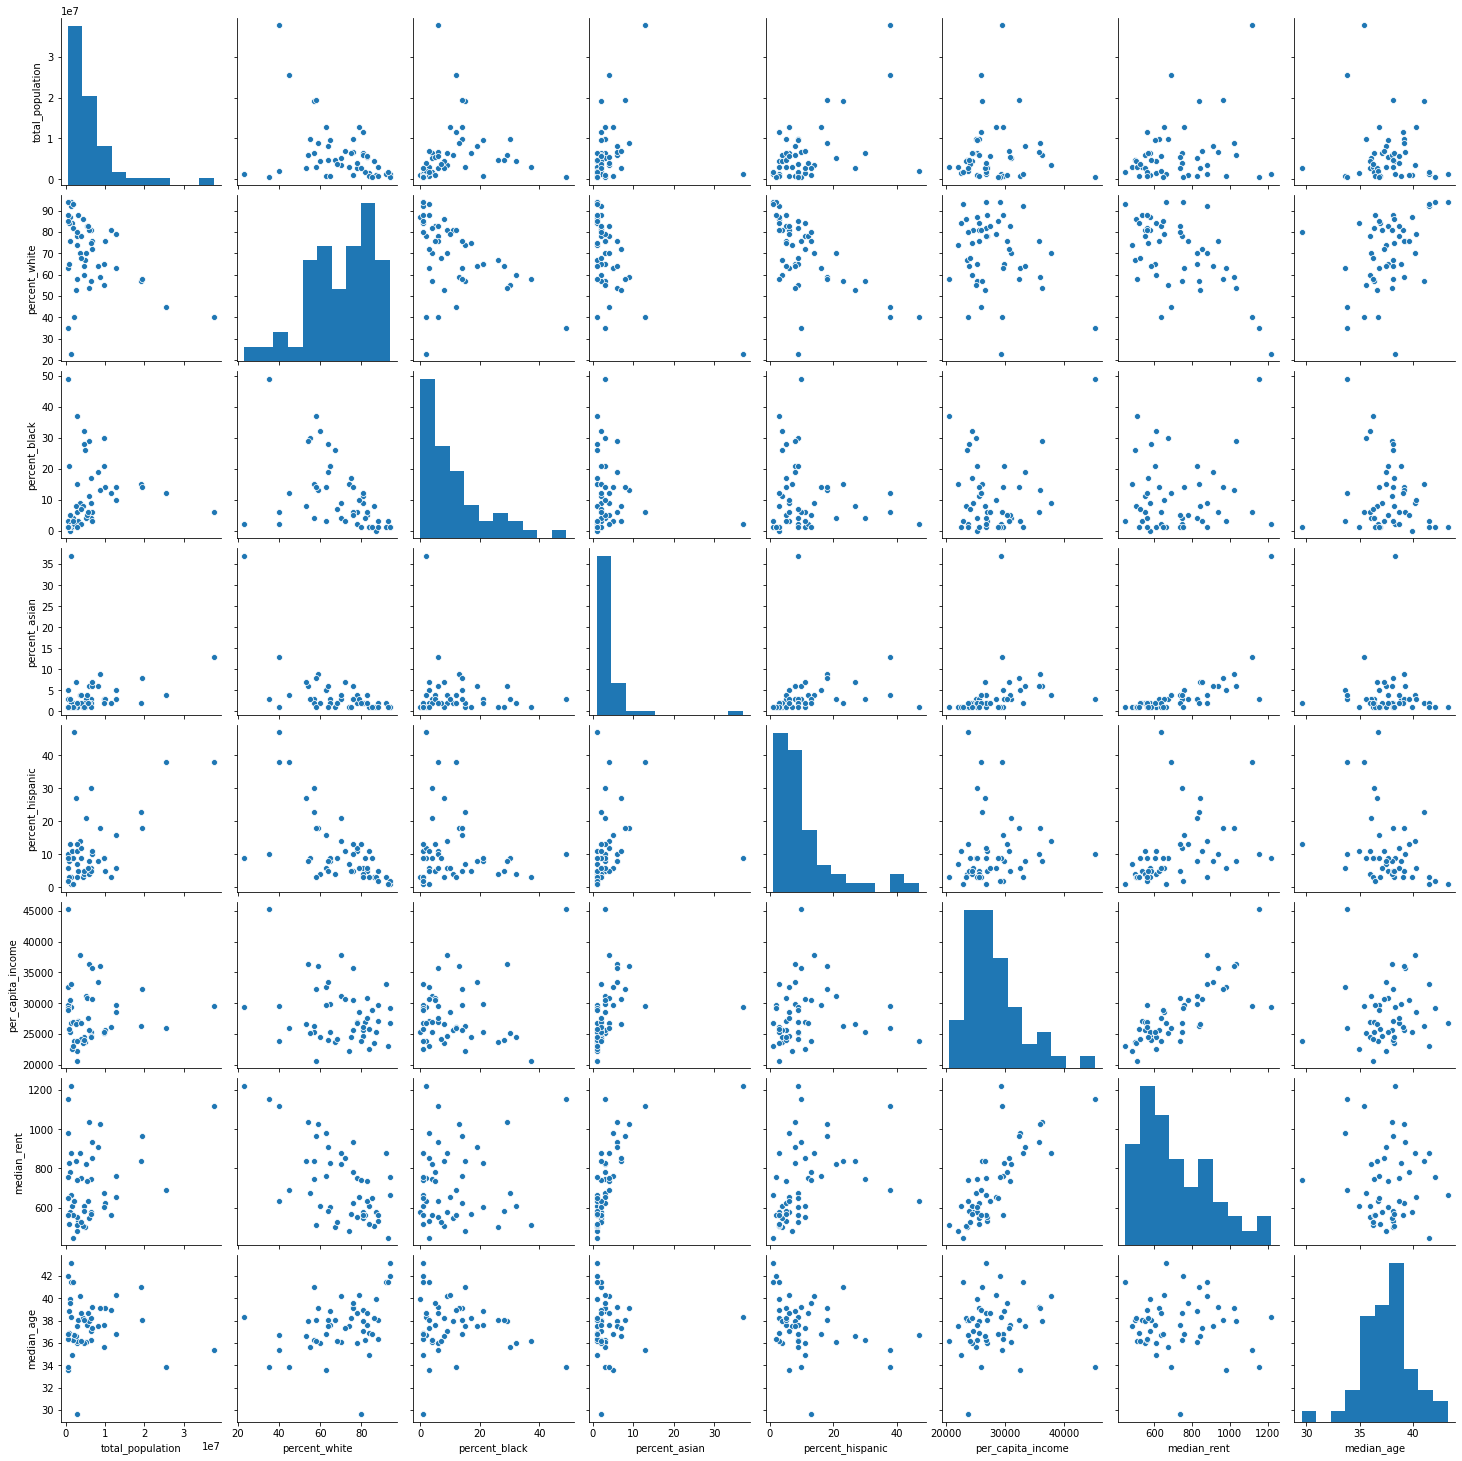

In [11]:
sns.pairplot(df)